In [5]:
import pandas as pd
import seaborn as sn
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


loaded the dataset in the notebook, happiness score is our target variable, it is a regression problem, will not be taking the columns country, region and happiness rank for the calculation of happiness score. scaling is not required. encoding is not required too.

# EDA

In [54]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

it gives the count of each value in the region.

In [55]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

there are no null values present in the dataset.

In [56]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

every column is float datatype except country and region.

In [57]:
df.shape

(158, 12)

the shape of the dataframe is 158 rows 12 columns

In [58]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


i do not find any skewness or outliers from the above data might have to check the box plot and skew method.

C:\Users\offic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

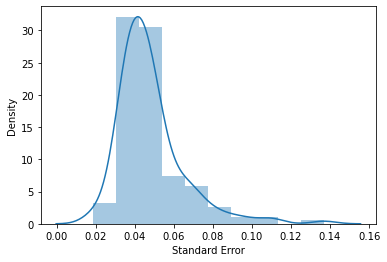

In [6]:
sn.distplot(df['Standard Error'],bins=10)

distribution looks little left skewed will have to check the skewness. outliers may be present.

C:\Users\offic\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

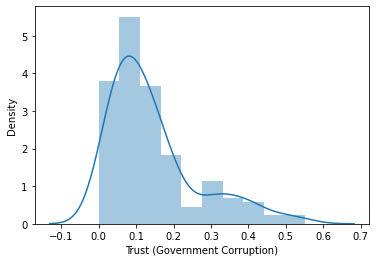

In [7]:
sn.distplot(df['Trust (Government Corruption)'],bins=10)

distribution looks skewed. outliers may be present.

In [59]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

as every column is present in the range of -5 to 5 hence we need not have to use any method to remove the skewness.

Happiness Rank                      AxesSubplot(0.125,0.536818;0.133621x0.343182)
Happiness Score                  AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Standard Error                    AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Family                           AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Health (Life Expectancy)               AxesSubplot(0.125,0.125;0.133621x0.343182)
Freedom                             AxesSubplot(0.285345,0.125;0.133621x0.343182)
Trust (Government Corruption)        AxesSubplot(0.44569,0.125;0.133621x0.343182)
Generosity                          AxesSubplot(0.606034,0.125;0.133621x0.343182)
Dystopia Residual                   AxesSubplot(0.766379,0.125;0.133621x0.343182)
dtype: object

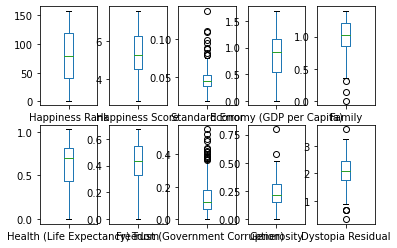

In [60]:
df.plot(kind='box',subplots=True,layout=(2,5))

i can see some outliers are present in some of the columns

<AxesSubplot:>

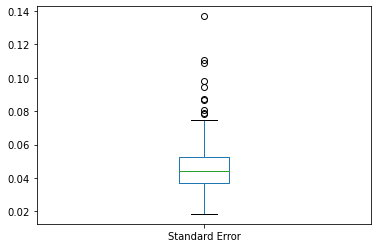

In [61]:
df['Standard Error'].plot.box()

outliers present

<AxesSubplot:>

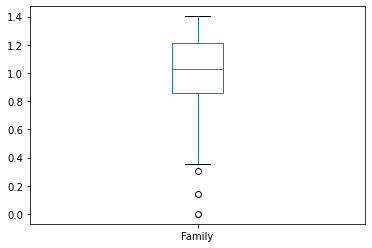

In [62]:
df['Family'].plot.box()

outliers present

<AxesSubplot:>

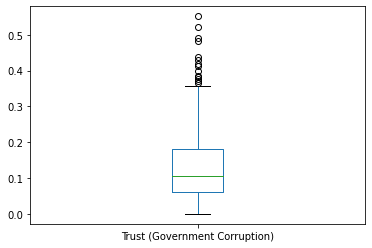

In [63]:
df['Trust (Government Corruption)'].plot.box()

outliers present

<AxesSubplot:>

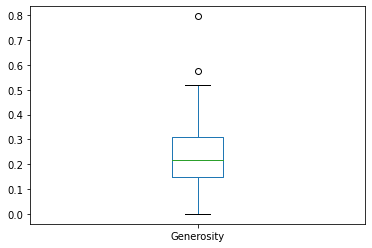

In [64]:
df['Generosity'].plot.box()

outliers present

<AxesSubplot:>

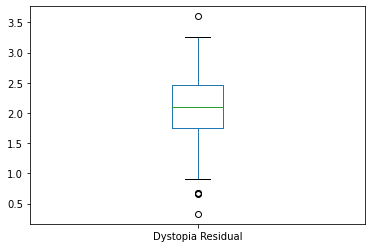

In [65]:
df['Dystopia Residual'].plot.box()

outliers present.

In [66]:
df_new=df.iloc[:,2:13]

separating the columns from the string data type for further data cleaning.

In [67]:
df_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


## removing outliers

In [68]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df_new))

checking the zscore value

In [69]:
z

array([[1.72099989, 1.93736005, 0.80592569, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.69907456, 1.91458063, 0.05588945, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.67714922, 1.88479215, 0.8544869 , ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.67742676, 2.0761992 , 0.13253425, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.69935209, 2.1646885 , 2.26396166, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.72127743, 2.22251319, 1.13418227, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [70]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([7, 2, 2, 2, 8, 4, 7, 9, 4], dtype=int64))


zscore values which are more than 3, as the threshold is 3.

In [71]:
df_new=df_new[(z<3).all(axis=1)]

removed the outliers

In [72]:
df_new.shape

(149, 10)

the new shape after removing the outliers. 149 rows 10 columns

In [73]:
df_new

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [74]:
x=df_new.iloc[:,2:10]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


separating the x variable for further data cleaning and train test split.

In [75]:
y=df_new.iloc[:,1]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

separated the target variable

In [76]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calculating the multicollinearity between the columns.

In [77]:
calc_vif(x)

,variables,VIF FACTOR
0,Standard Error,8.888012
1,Economy (GDP per Capita),24.700853
2,Family,30.287069
3,Health (Life Expectancy),24.614147
4,Freedom,16.744492
5,Trust (Government Corruption),3.730831
6,Generosity,6.171173
7,Dystopia Residual,14.123291


after seeing the vif, family vif is more, did drop the column, but the model was not performing well. hence not dropping any column.

In [78]:
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


## training the model and choosing the best model

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [80]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=r2_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.868066301235505 on random state 196


best accuracy is at 196 random state

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=196)

performed the train test split.

In [82]:
model=[DecisionTreeRegressor(),SVR(),LinearRegression(),KNeighborsRegressor()]
for a in model:
    a.fit(x_train,y_train)
    a.score(x_train,y_train)
    predm=a.predict(x_test)
    print('accuracy score of' ,a, 'is:')
    print(r2_score(y_test,predm))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,predm)))
    print('\n')

accuracy score of DecisionTreeRegressor() is:
0.8612125821361637
error:
Mean absolute error: 0.3679200000000001
mean squared error: 0.18850388
root Mean Squared Error:  0.43417033523722004


accuracy score of SVR() is:
0.9940997432149344
error:
Mean absolute error: 0.07063815079981788
mean squared error: 0.008013848186673403
root Mean Squared Error:  0.08952009934463546


accuracy score of LinearRegression() is:
0.9999999413780087
error:
Mean absolute error: 0.00023616162375962092
mean squared error: 7.962157503193824e-08
root Mean Squared Error:  0.00028217295233940874


accuracy score of KNeighborsRegressor() is:
0.9572307377778437
error:
Mean absolute error: 0.1981799999999999
mean squared error: 0.05809007759999999
root Mean Squared Error:  0.24101883245920844




evaluated the score of 4 models, best model is linear regression as it has the best score.

In [83]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(DecisionTreeRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[ -5.68569574  -8.19181693  -5.98278484 -10.4853386   -5.74486283]
-7.2180997857215985
1.879769498905491


score.mean is in negative hence it is not a good model.

In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(SVR(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-0.86477957  0.85122243  0.83790056  0.68647261 -0.36403879]
0.229355446644835
0.7092601694968158


it has only 22.9% of score hence it is not a strong model

In [85]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(LinearRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99999943 0.99999847 0.99999831 0.99999509 0.99999933]
0.9999981234686345
1.5837827108856898e-06


best score.mean which is 99.9%. best model.

In [86]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(KNeighborsRegressor(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[-7.02483867 -1.47073783 -0.61969976 -3.62749463 -5.30036315]
-3.6086268080041677
2.367998543988997


negative score hence not a good model.

after seeing the model performance and cross val score, best model is linear regression.

In [87]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [92]:
parameter={'fit_intercept':['True','False'],
         'normalize':['True','False'],
          'copy_X':['True','False'],
          'n_jobs':np.arange(0,10),
          'positive':['True','False']}

In [93]:
GCV=GridSearchCV(LinearRegression(),parameter,cv=5)

In [94]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False'],
                         'fit_intercept': ['True', 'False'],
                         'n_jobs': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': ['True', 'False'],
                         'positive': ['True', 'False']})

In [95]:
GCV.best_params_

{'copy_X': 'True',
 'fit_intercept': 'True',
 'n_jobs': 0,
 'normalize': 'True',
 'positive': 'True'}

In [98]:
happy_mod=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=0,normalize=True,positive=True)
happy_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

99.99999413775187


did the hyper parameter tuning to improve the r2_score. its finally 99.99%, almost 100%.

In [99]:
import joblib
joblib.dump(happy_mod,"happymodel.pkl")

['happymodel.pkl']

saving the best model in a pkl file.